In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [2]:
data_dir='E:\Abdulrahman/cellula_computer_vision_intership/first_session_code/Week1/Teeth_Dataset'
target_folder='Training'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
train_df = pd.concat([f_series, l_series], axis=1)
train_df


filepath labels
0     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
1     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
2     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
3     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
4     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
...                                                 ...    ...
3082  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
3083  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
3084  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
3085  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
3086  E:\Abdulrahman/cellula_computer_vision_intersh...     OT

[3087 rows x 2 columns]

In [3]:
train_df['labels'].value_counts()

labels
MC     540
OLP    540
CaS    480
CoS    450
OT     393
Gum    360
OC     324
Name: count, dtype: int64

In [4]:
data_dir='E:\Abdulrahman/cellula_computer_vision_intership/first_session_code/Week1/Teeth_Dataset'
target_folder='Testing'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
test_df = pd.concat([f_series, l_series], axis=1)
test_df

filepath labels
0     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
1     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
2     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
3     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
4     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
...                                                 ...    ...
1023  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1024  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1025  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1026  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1027  E:\Abdulrahman/cellula_computer_vision_intersh...     OT

[1028 rows x 2 columns]

In [5]:
data_dir='E:\Abdulrahman/cellula_computer_vision_intership/first_session_code/Week1/Teeth_Dataset'
target_folder='Validation'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
valid_df = pd.concat([f_series, l_series], axis=1)
valid_df

filepath labels
0     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
1     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
2     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
3     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
4     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
...                                                 ...    ...
1023  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1024  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1025  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1026  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1027  E:\Abdulrahman/cellula_computer_vision_intersh...     OT

[1028 rows x 2 columns]

In [6]:
train_counts = train_df['labels'].value_counts().reset_index()
train_counts.columns = ['labels', 'count']

In [7]:
train_counts

labels  count
0     MC    540
1    OLP    540
2    CaS    480
3    CoS    450
4     OT    393
5    Gum    360
6     OC    324

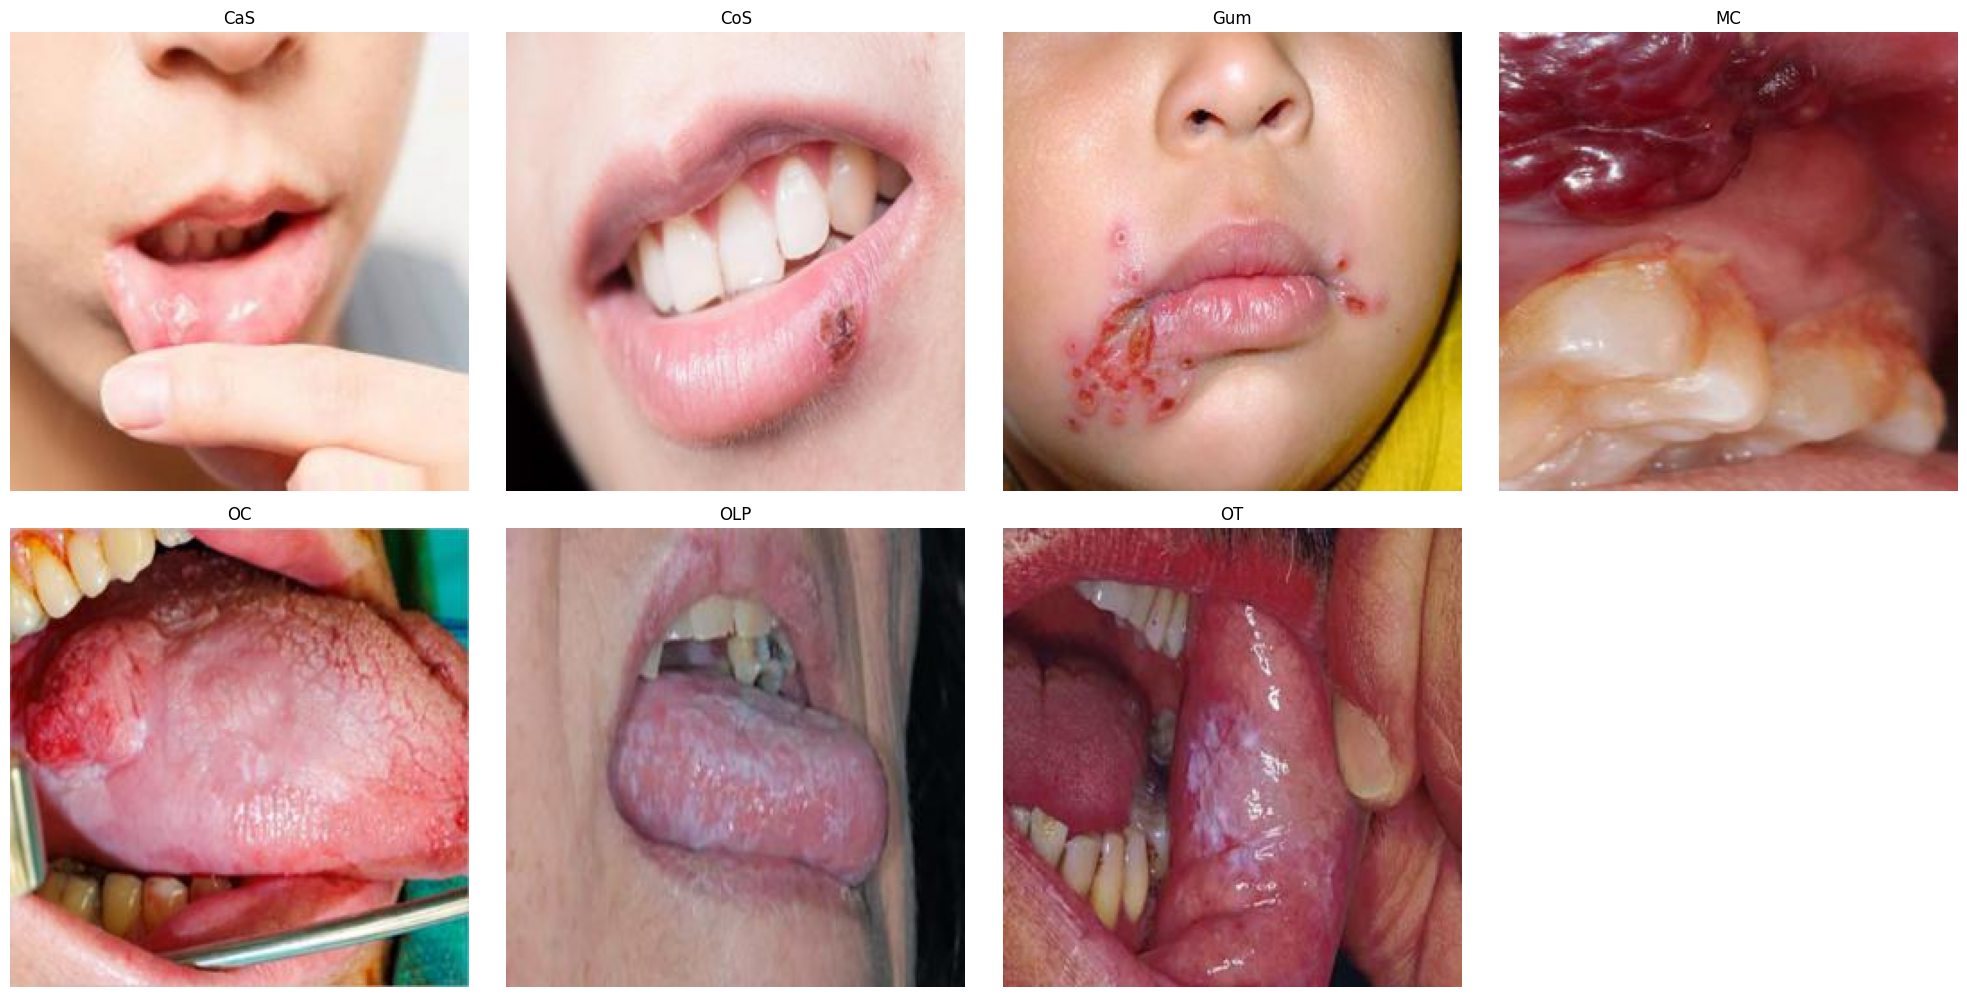

In [8]:
# Get unique classes
classes = train_df['labels'].unique()

# Create class-to-index dictionary
g_dict = {class_name: index for index, class_name in enumerate(classes)}

# Create a sample of one image per class
sample_df = train_df.groupby('labels').first().reset_index()

# Limit to 16 classes max (if desired)
sample_df = sample_df.head(16)

# Plot sample images
plt.figure(figsize=(20, 20))
for i, (_, row) in enumerate(sample_df.iterrows()):
    plt.subplot(4, 4, i + 1)
    img_path = row['filepath']
    image = Image.open(img_path)
    image = np.array(image) / 255.0
    plt.imshow(image)
    plt.title(row['labels'], color='black', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(3087, 2)
(1028, 2)
(1028, 2)


In [10]:
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
gen = ImageDataGenerator()
ts_gen=ImageDataGenerator()

train_gen = gen.flow_from_dataframe( train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size,
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = gen.flow_from_dataframe( valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, 
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, 
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)

Found 3087 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.


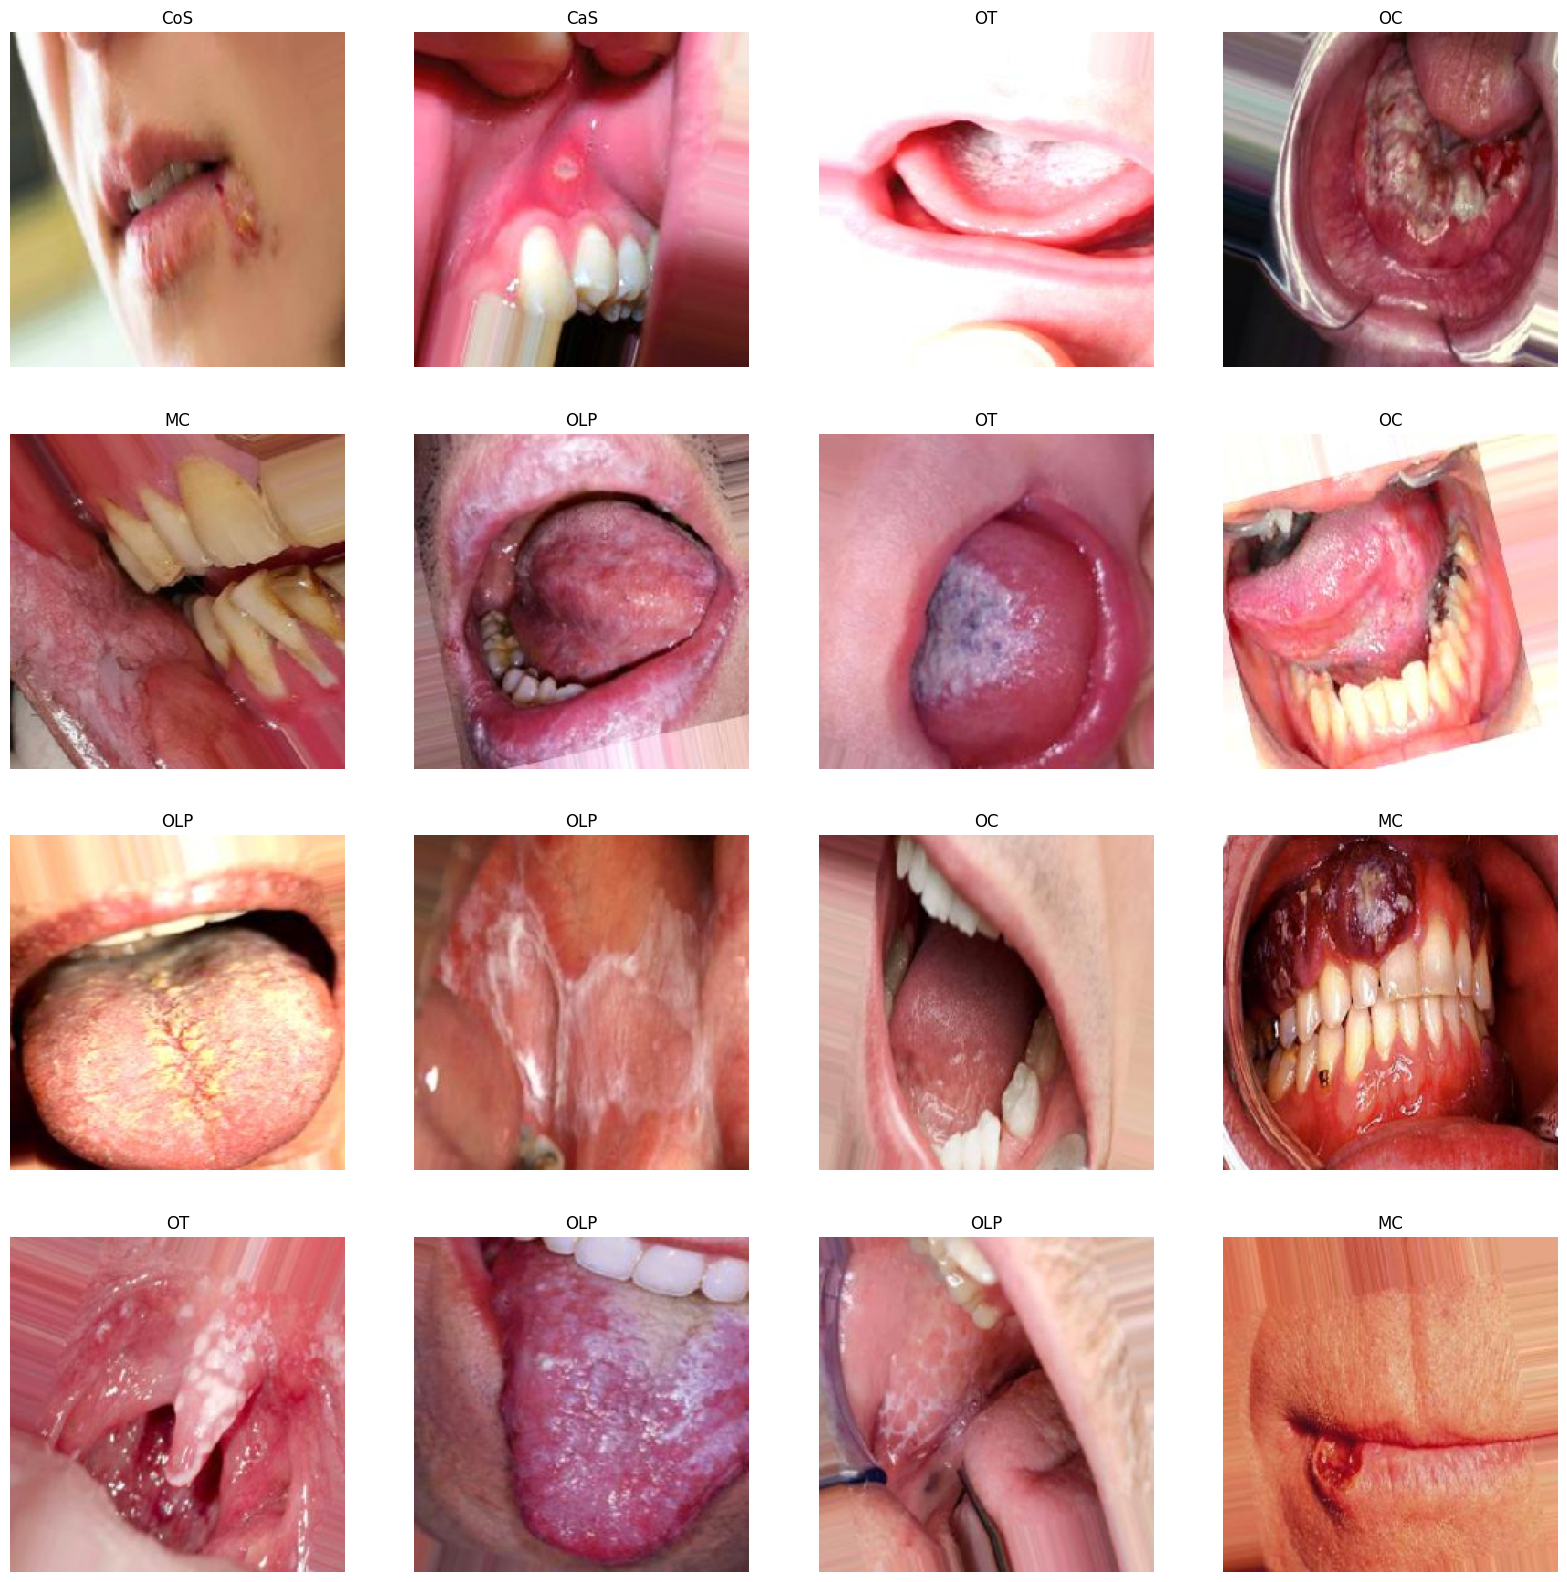

In [11]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=img_shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

e:\Installation_programs\anaconda3\envs\py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history=model.fit(train_gen,validation_data=valid_gen,epochs=100)

Epoch 1/100
97/97 [==============================] - 29s 207ms/step - loss: 3.9393 - accuracy: 0.1788 - val_loss: 1.8488 - val_accuracy: 0.2539
Epoch 2/100
97/97 [==============================] - 6s 59ms/step - loss: 1.8304 - accuracy: 0.2679 - val_loss: 1.8034 - val_accuracy: 0.2733
Epoch 3/100
97/97 [==============================] - 6s 57ms/step - loss: 1.7702 - accuracy: 0.2789 - val_loss: 1.6297 - val_accuracy: 0.3755
Epoch 4/100
97/97 [==============================] - 6s 57ms/step - loss: 1.7403 - accuracy: 0.3022 - val_loss: 1.6259 - val_accuracy: 0.3541
Epoch 5/100
97/97 [==============================] - 6s 57ms/step - loss: 1.6969 - accuracy: 0.3265 - val_loss: 1.5796 - val_accuracy: 0.3774
Epoch 6/100
97/97 [==============================] - 6s 57ms/step - loss: 1.6636 - accuracy: 0.3424 - val_loss: 1.5435 - val_accuracy: 0.3794
Epoch 7/100
97/97 [==============================] - 6s 58ms/step - loss: 1.6346 - accuracy: 0.3580 - val_loss: 1.5314 - val_accuracy: 0.3940
Epoc

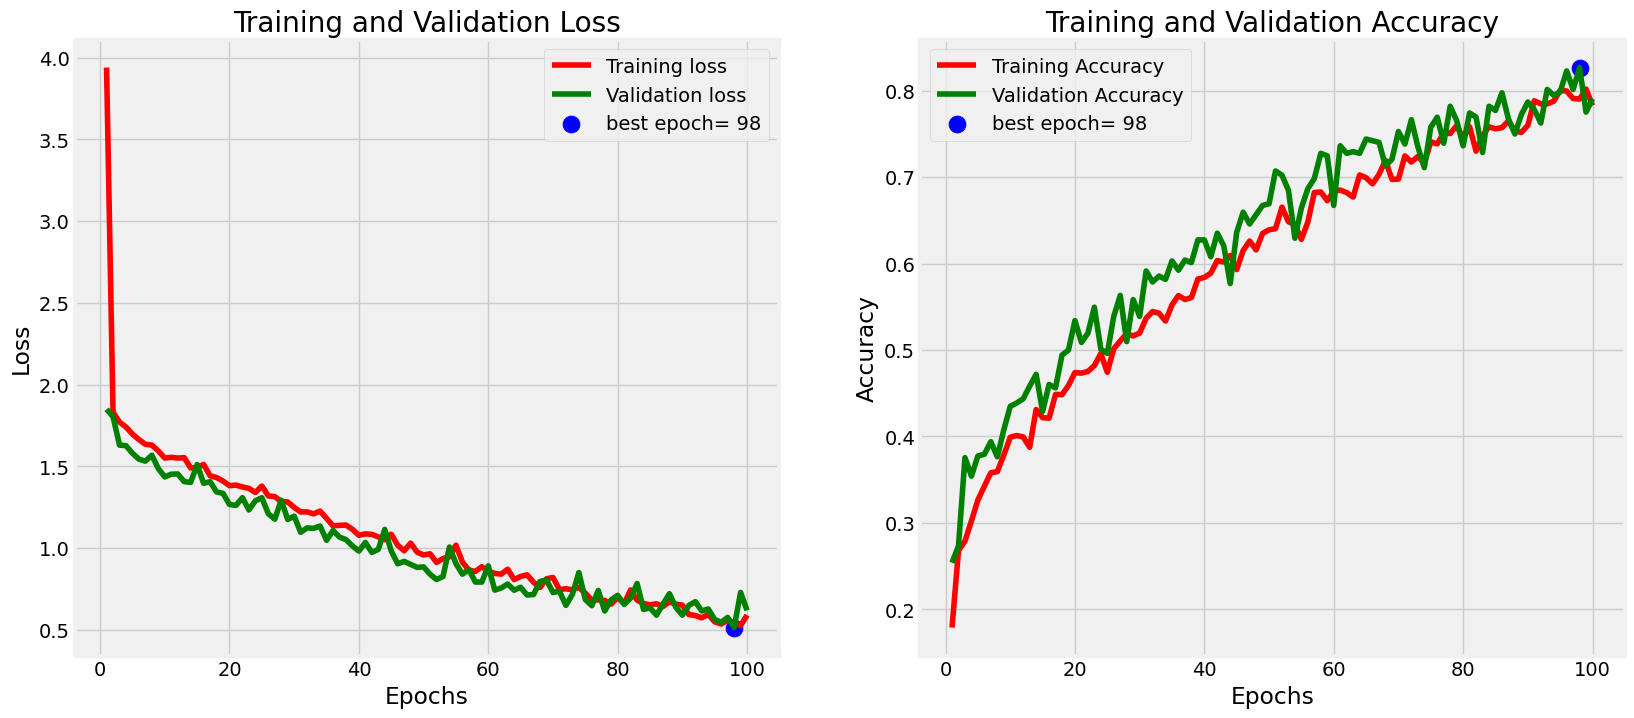

In [13]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [14]:
train_score = model.evaluate(train_gen,verbose= 1)
valid_score = model.evaluate(valid_gen,verbose= 1)
test_score = model.evaluate(test_gen,verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

33/33 [==============================] - 5s 165ms/step - loss: 0.5603 - accuracy: 0.8230
Train Loss:  0.33493271470069885
Train Accuracy:  0.8918043375015259
--------------------
Valid Loss:  0.6180210709571838
Valid Accuracy:  0.7908560037612915
--------------------
Test Loss:  0.5603085160255432
Test Accuracy:  0.8229572176933289


In [13]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam


In [14]:
input_shape = (224, 224, 3)  
num_classes = 7  

base_model = EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)
base_model.trainable = False  

# Build model
inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)  

model2 = models.Model(inputs, outputs)


In [22]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # use 'binary_crossentropy' for multi-label
    metrics=['accuracy']
)


In [23]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history2 = model2.fit(
    train_gen,  # tf.data or Keras ImageDataGenerator
    validation_data=valid_gen,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
97/97 [==============================] - 15s 107ms/step - loss: 1.4126 - accuracy: 0.4603 - val_loss: 1.0211 - val_accuracy: 0.6411
Epoch 2/20
97/97 [==============================] - 9s 89ms/step - loss: 0.9648 - accuracy: 0.6560 - val_loss: 0.8216 - val_accuracy: 0.7121
Epoch 3/20
97/97 [==============================] - 9s 89ms/step - loss: 0.7974 - accuracy: 0.7353 - val_loss: 0.7142 - val_accuracy: 0.7802
Epoch 4/20
97/97 [==============================] - 9s 89ms/step - loss: 0.6958 - accuracy: 0.7732 - val_loss: 0.6434 - val_accuracy: 0.7899
Epoch 5/20
97/97 [==============================] - 9s 89ms/step - loss: 0.6378 - accuracy: 0.7872 - val_loss: 0.5856 - val_accuracy: 0.8123
Epoch 6/20
97/97 [==============================] - 9s 89ms/step - loss: 0.5664 - accuracy: 0.8183 - val_loss: 0.5371 - val_accuracy: 0.8375
Epoch 7/20
97/97 [==============================] - 9s 89ms/step - loss: 0.5332 - accuracy: 0.8341 - val_loss: 0.5032 - val_accuracy: 0.8414
Epoch 8/20


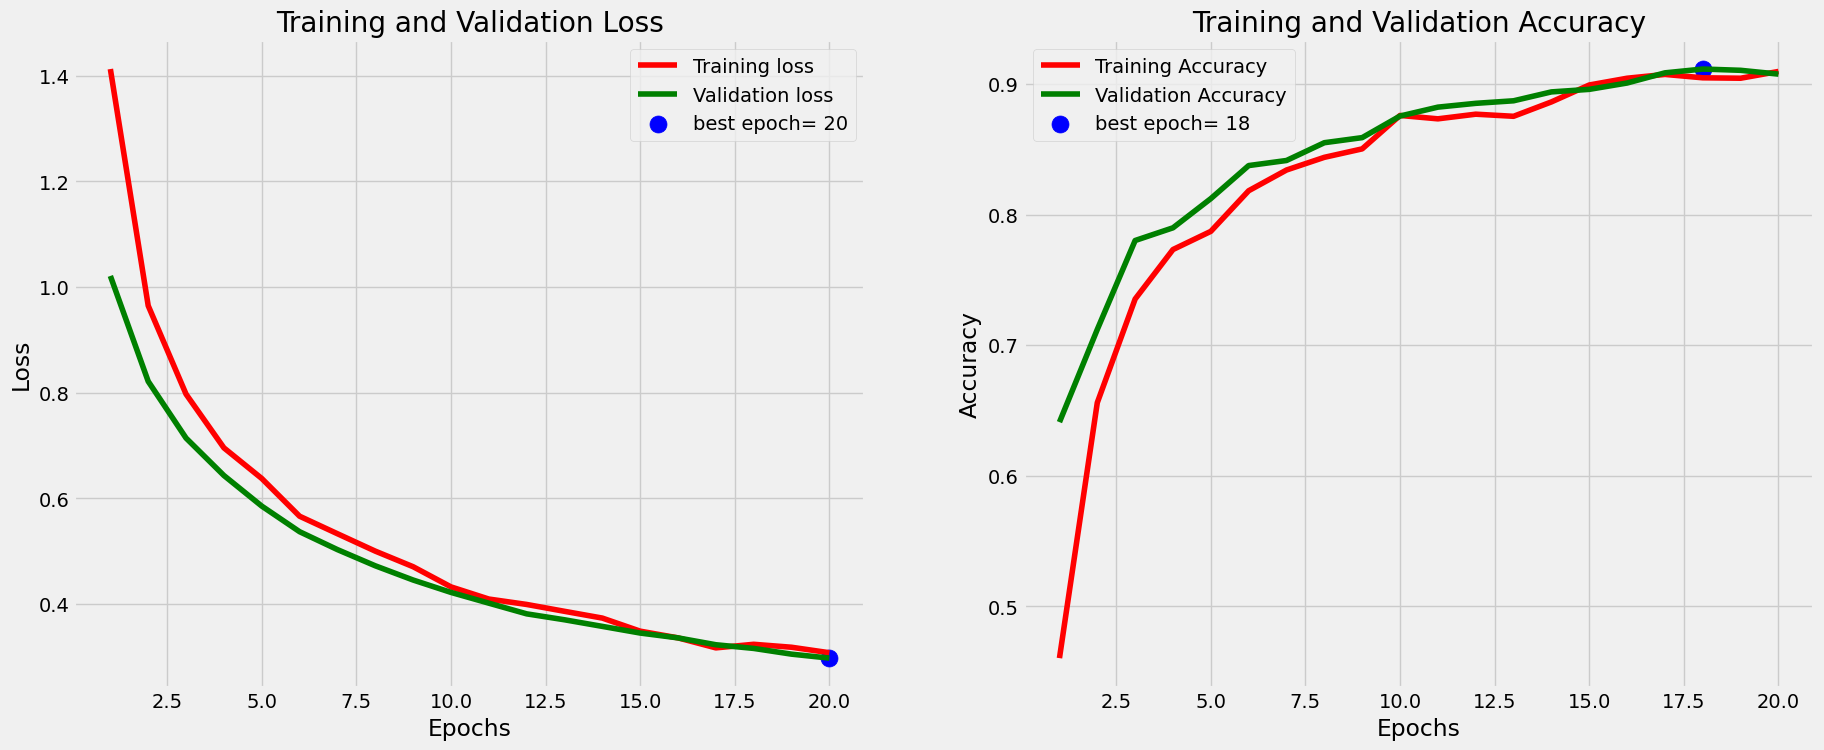

In [24]:
tr_acc = history2.history['accuracy']
tr_loss = history2.history['loss']
val_acc = history2.history['val_accuracy']
val_loss = history2.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [25]:
train_score = model2.evaluate(train_gen,verbose= 1)
valid_score = model2.evaluate(valid_gen,verbose= 1)
test_score = model2.evaluate(test_gen,verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

33/33 [==============================] - 2s 67ms/step - loss: 0.2964 - accuracy: 0.9183
Train Loss:  0.19189870357513428
Train Accuracy:  0.9676060676574707
--------------------
Valid Loss:  0.29782289266586304
Valid Accuracy:  0.9075875282287598
--------------------
Test Loss:  0.2964390516281128
Test Accuracy:  0.9182879328727722


In [28]:
print(len(base_model.layers))

270


In [16]:
base_model.trainable = True

inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)  

model3 = models.Model(inputs, outputs)


for layer in base_model.layers[:200]:  
    layer.trainable = False

model3.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6
)


history3 = model3.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=30,
    callbacks=[early_stop,reduce_lr]
)



Epoch 1/30
 7/97 ━━━━━━━━━━━━━━━━━━━━ 1:03 710ms/step - accuracy: 0.7166 - loss: 1.0610

KeyboardInterrupt: 

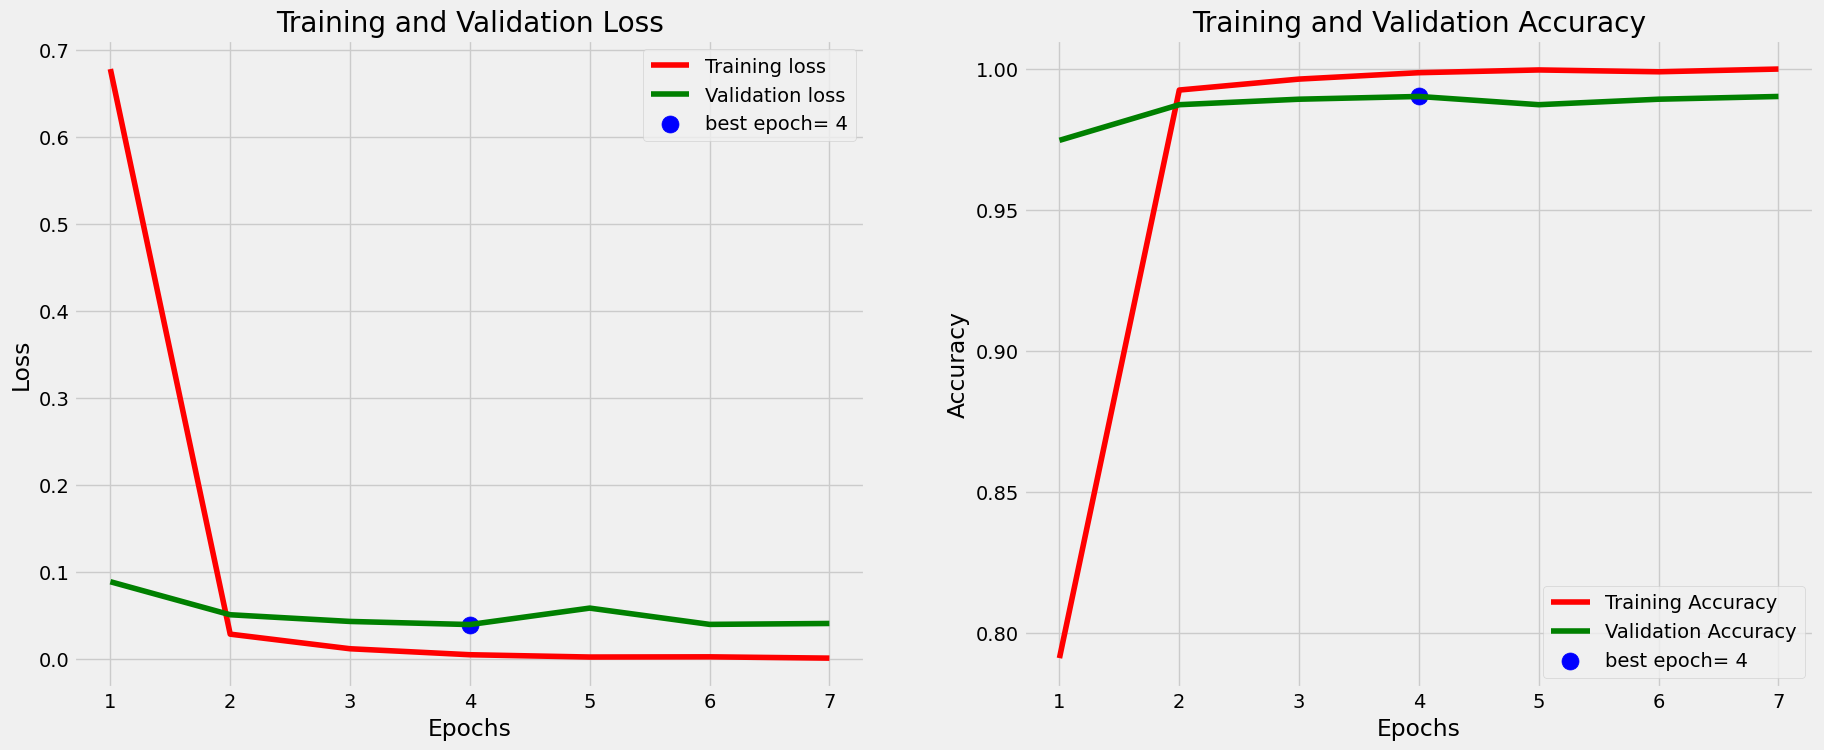

In [ ]:
tr_acc = history3.history['accuracy']
tr_loss = history3.history['loss']
val_acc = history3.history['val_accuracy']
val_loss = history3.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
train_score = model2.evaluate(train_gen,verbose= 1)
valid_score = model2.evaluate(valid_gen,verbose= 1)
test_score = model2.evaluate(test_gen,verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

33/33 [==============================] - 2s 65ms/step - loss: 1.5856 - accuracy: 0.8541
Train Loss:  1.7469909191131592
Train Accuracy:  0.8807904124259949
--------------------
Valid Loss:  1.5828814506530762
Valid Accuracy:  0.8677042722702026
--------------------
Test Loss:  1.5856460332870483
Test Accuracy:  0.8540856242179871


In [ ]:
model3.save("efficientnetv2_model.h5")  # Save as HDF5
model3.save("efficientnetv2_model.h5")
